# Clustering

## Part 1 - Necessary Code

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.datasets import make_blobs, make_moons

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import silhouette_visualizer

In [2]:
# Colors
green = "#03AC13"
caribbean_green = "#00CC99"
purple = "#880085"

# Import company colors
with open('plot_colors_nf.json', 'r') as pc:
    color_dict = json.load(pc)

c_light, c_dark, c_blue = color_dict['color_light'], color_dict['color_dark'], color_dict['color_blue']

# Define color map for plotting
color_map = ListedColormap([c_blue, c_light, c_dark, green, caribbean_green, purple])

matplotlib.rcParams['axes.edgecolor'] = '#000000'

### Generate Data

In [3]:
def create_data(n_samples=100, cluster_spread=1, RSEED=42):
    blobs = make_blobs(n_samples=n_samples, n_features=2, cluster_std=cluster_spread, random_state=RSEED)
    df = pd.DataFrame(blobs[0], columns=['x', 'y'])
    df['labels'] = blobs[1]
    return df

In [4]:
# Create blobs with same spread
df_blobs = create_data(cluster_spread=1.5)

# Create blobs with different density
df_density = create_data(n_samples=200, cluster_spread=[1.0, 2.5, 0.5], RSEED=170)
y_density_pred = KMeans(n_clusters=3, random_state=0, n_init='auto').fit_predict(df_density[['x', 'y']])

# Generate data for stretched clusters
df_stretched = create_data(n_samples=600, RSEED=170)
# transform the data to be stretched
rng = np.random.RandomState(74)
transformation = rng.normal(size=(2, 2))
df_stretched[['x', 'y']] = np.dot(df_stretched[['x', 'y']], transformation)
y_stretched_pred = KMeans(n_clusters=3, random_state=0, n_init='auto').fit_predict(df_stretched[['x', 'y']])

# Create moon shaped data
X_moon, y_moon = make_moons(n_samples=200, noise=0.05, random_state=0)
#df_moon = pd.DataFrame([X_moon, y_moon], columns=['x', 'y', 'label'])
df_moon = pd.DataFrame([X_moon[:,0], X_moon[:,1], y_moon]).T
df_moon.columns = ['x', 'y', 'label']

In [5]:
def plot_data(data, n_cluster=3, figsize=(10,6), marker_size=100, centroids=False, ax=None):
    # plotting
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        plt.gca()

    # Create predictions
    kmeans = KMeans(n_cluster, n_init='auto', random_state=42)
    kmeans.fit(data.iloc[:, :2])
    y_pred = kmeans.predict(data.iloc[:, :2])
    
    # Plot data
    ax.scatter(data.iloc[:,0], data.iloc[:,1], s=marker_size, c=y_pred, cmap=color_map)
    
    if centroids:
        ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="v", c='black')
    
    
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    ax.grid(False)
    sns.despine()

### Plot K-means

In [6]:
def plot_clusters(n_iter, centroids, n_clusters, data, figsize=(10,6), ax=None):
    # plotting
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        plt.gca()
    
    color_dict = {0: c_light, 1: c_blue, 2: green, 3: caribbean_green, 4: purple}
    sns.set_context("talk", font_scale=0.8, rc={"lines.linewidth": 2.})
    
    if n_iter>0:
        kmeans = KMeans(n_clusters=n_clusters, init=centroids, n_init=1, max_iter=n_iter)
        kmeans.fit(data[['x', 'y']])
        color_labels = [color_dict[i] for i in kmeans.labels_]
        ax.scatter(data['x'], data['y'], c=color_labels, s=25)
    
    if n_iter<1:
        ax.scatter(data['x'], data['y'], c=c_dark, s=25)
    
    if n_iter==0:
        ax.scatter(centroids[:,0], centroids[:,1], marker="d", s=150, c=list(color_dict.values())[:n_clusters])
    elif n_iter>0:
        ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="d", s=150, c=list(color_dict.values())[:n_clusters])

    
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 12)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid(False)
    sns.despine()

## Part 2 - Lecture

<div class="slide-title">
    
# Clustering
    
</div>

## Unsupervised Learning

<div class="group">
  <div class="text">
      
1. Dimensionality Reduction
      * reducing dimension of feature space by finding informative feature representations (for ML algorithms or humans)
      * visualization in 2D
      
2. **Clustering**
      * grouping similar samples
      
  </div>
  <div class="images">
    <img src="../images/clustering/img_p0_1.png">
  </div>
</div>

Notes: Yesterday we entered the realm of unsupervised learning. Learnt about dimensionality reduction as one of the techniques. Today, we talk about clustering. 

So basically what clustering does is to group similar samples / observations together. Some of the main applications in industry of clustering based approaches are customer segmentation and recommender systems for targeted marketing purposes.  

In case of a strong group you might want to include the following warm up which connects several topics of this week. Make participants aware that it partly needs some research.


In [7]:
# Warm-up: Try to find pairs (using ipython, e.g.)
# CAVEAT:  requires some research!

left = [
 'Outlier or anomaly detection can be used',
 'Principal Component Analysis (PCA) is a method',
 'Principal Component Analysis (PCA) is frequently used',
 'There are many clustering methods',
 'Most clustering algorithms are based on a distance metric',
 'Gaussian Mixture Models (GMM) are a generative model',
 'Unsupervised learning is a family of machine learning methods',
 'The "curse of dimensionality" is a problem',
 't-SNE reduces data to two dimensions'
]

right = [
 'to visualize complex datasets.',
 'that becomes worse the more features you have.',
 'to identify credit card fraud.',
 'for dimensionality reduction.',
 'e.g. Euclidean or Manhatten distance.',
 'that do not require labled data.',
 'for detecting outliers.',
 'as part of a supervised learning pipeline.',
 'like K-means, agglomeration, or DBSCAN.'
]

In [8]:
for i,j in zip(range(9), [2, 3, 7, 8, 4, 6, 5, 1, 0]):
    print(left[i], right[j], '\n')

Outlier or anomaly detection can be used to identify credit card fraud. 

Principal Component Analysis (PCA) is a method for dimensionality reduction. 

Principal Component Analysis (PCA) is frequently used as part of a supervised learning pipeline. 

There are many clustering methods like K-means, agglomeration, or DBSCAN. 

Most clustering algorithms are based on a distance metric e.g. Euclidean or Manhatten distance. 

Gaussian Mixture Models (GMM) are a generative model for detecting outliers. 

Unsupervised learning is a family of machine learning methods that do not require labled data. 

The "curse of dimensionality" is a problem that becomes worse the more features you have. 

t-SNE reduces data to two dimensions to visualize complex datasets. 



## Clustering
Idea: Partition the dataset into groups (clusters) so that
- observations in same cluster are as similar as possible
- observations in different clusters are as different as possible
* application examples
    * anomaly detection (e.g. fraud detection, technical maintenance)
    * recommender systems (e.g. literature/movie/cloth recommendations)
    * no personalized but groupwise patient treatments (e.g. rehabilitation programs)
    * ...



Notes: In general, we need to understand the two points first. They are somewhat redundant (cohesion vs. separation), two sides of one coin.   

(Although they do not always have to be defined: sklearn's kmeans, e.g. does not allow to select the distance metric and doesn't need a definition for inter-cluster distance metric.)

## Similarity Measures
The distance between two points $a_1$ and $a_2$ in n-dimensional space    
can be measured in different ways:  
<div class="group">
  <div class="text_70">

* Euclidean distance ("length" of connecting line)  
* Manhattan distance ([taxicab distance](https://en.wikipedia.org/wiki/Taxicab_geometry))   
* Minkowski distance (generalisation of above distance metrics)  
      <br>
* Cosine similarity (cosine of the enclosed angle)  
<br><br>
* The similarity of sets A and B can be measured by the [Jaccard index](https://en.wikipedia.org/wiki/Jaccard_index)    
* ...      
  </div>
  <div class="image_30">
$ d_{Eucl}(a_1,a_2) = \sqrt{(a_2-a_1)^2} $  
$ d_{Manhattan}(a_1,a_2) = \sum_{i=1}^n \left|a_{2,i} - a_{1,i}\right|$  
$ d_{Mink}(a_1,a_2) = \biggl(\sum_{i=1}^n |a_{2,i}-a_{1,i}|^k\biggr)^{\frac{1}{k}}$     
$ d_{cosine}(a_1,a_2) = {a_1 \cdot a_2 \over {\|a_1\| \|a_2\|}}$<br>
<br><br>      
$ J(A,B) = \frac{|A \cap B|}{|A \cup B|} $  

  </div>
</div>

Notes: If we want to define which observations are similar, we need to define what is meant by "similar".

### Application examples for *DS purposes*
* convenient inspection of single clusters (instead of the complete dataset, e.g. for visualisations)
* create groups as features or outcomes for predictive regression or classification model
* create pseudo-labels for semi-supervised learning


Notes: Besides practical applications, what would be some technical reasons...

What are we doing when we use groups/clusters as features? (--> feature engineering)

## K-Means clustering

Notes: k-means is called the “fast food” of clustering old algorithm, proposed in 1957 by Stuart Lloyd

### Idea of K-means

* Define the number of clusters, k (hyperparameter).  
* Assign all observations to a certain cluster so that within-cluster distances (hyperparameter) are minimal.

<div class="alert alert-block alert-info">
<b>Note:</b> 

Cluster mean does not refer to a single number, but to the n-dimensional means of all features.
</div>

Notes: kmeans in general does, but sklearn does not allow to select the similarity measure. It's hard-coded to be Euclidean.

### Example

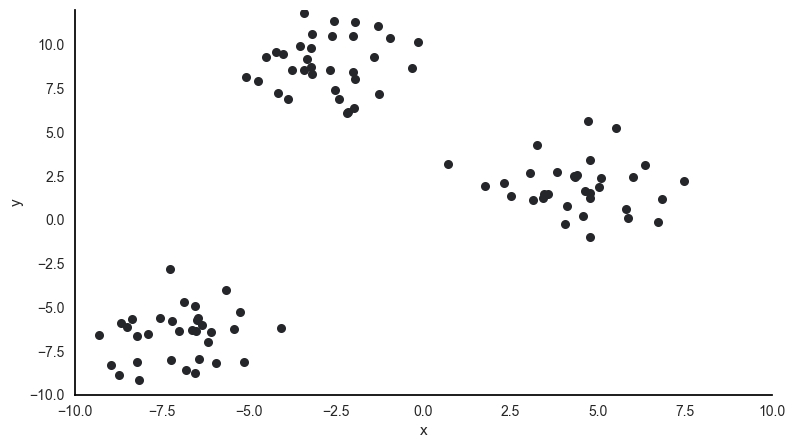

In [9]:
centroids_3 = np.array([[-7.5, 5], [2.5, -2], [4, 8]])    
plot_clusters(n_iter=-1, centroids=centroids_3, n_clusters=3, data=df_blobs, figsize=(9,5))

Sample with **two features** x and y, **100 observations** and obviously **3 clusters**.

Notes: Mention that the number of clusters is usually not know in advance.

### Example

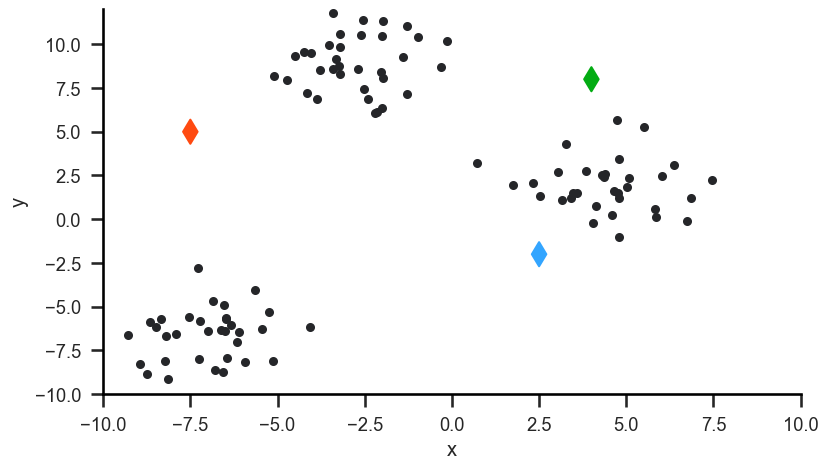

In [10]:
plot_clusters(n_iter=0, centroids=centroids_3, n_clusters=3, data=df_blobs, figsize=(9,5))

**Step 0:** Randomly initialize (or user-define) starting cluster __centroids__. 

**Step 1:** Assign observations to closest cluster centroid (initial/new clusters). 

Notes: We introduced a new term here called "centroid". Basically the center point / point of gravity of a cluster. 

initialization: k-means++, tends to select centroids that are distant from one another 

assignment (you can draw/annotate the cluster boundaries directly into the plot)  

Instead of using the self-written code, you may want to clone this repo and open kmeans.html with your browser. This visualization is really intuitive and easily understandable:`git clone https://github.com/karanveerm/kmeans.git`  
or: use the link from Naftali Harris below.

### Example

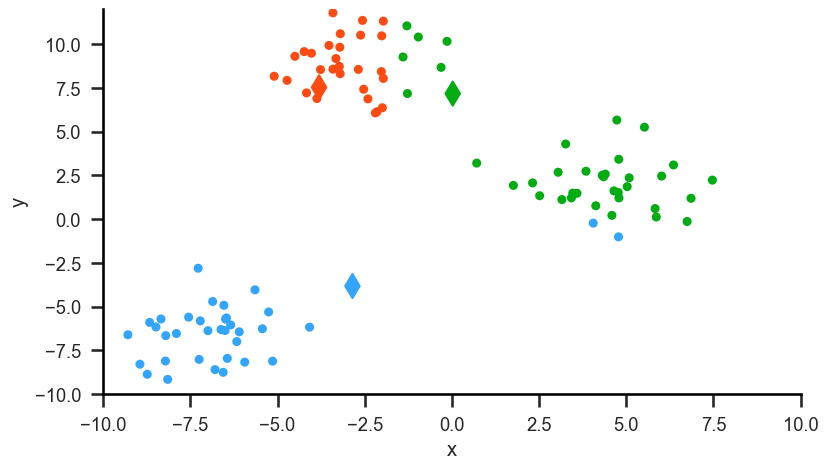

In [11]:
plot_clusters(n_iter=2, centroids=centroids_3, n_clusters=3, data=df_blobs, figsize=(9,5))

**Step 2:** For each cluster (*here*: red, green, blue) calculate the mean values for each of the features (*here*: y and x). These mean values are the coordinates of the new cluster centroids: 

$${\bar{x}}_{k}={\frac{1}{n_{k}}}\sum_{i\in{C}(k)}x_{i}\;\;\text{and}\;\;{\bar{y}}_{k}={\frac{1}{n_{k}}}\sum_{i\in{C}(k)}y_{i}$$

### Example


<div class="group">
  <div class="text">
      
**Step 3:** Repeat from **Step 1** (reassign points) until the following sum is minimised: 
      
  </div>
  <div class="images">

$$D_{k}=\sum_{i\in{C}(k)}(x_{i}-\bar{x}_{k})^2+(y_{i}-\bar{y}_{k})^2$$
      
$$\text{min}\;DD=\sum_{k=1}^{3}D_{k}$$

  </div>
</div>

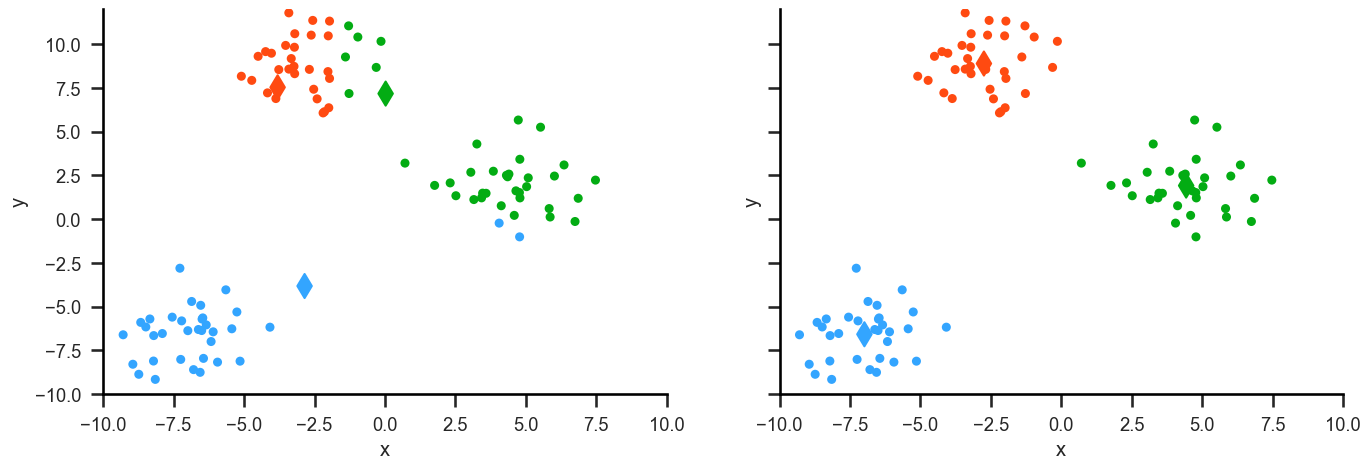

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(16,5), sharey=True)
plot_clusters(n_iter=2, centroids=centroids_3, n_clusters=3, data=df_blobs, ax=ax[0])
plot_clusters(n_iter=4, centroids=centroids_3, n_clusters=3, data=df_blobs ,ax=ax[1])

Notes: K-means has a cost function and we can check whether the algorithm gets better or worse. The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion. Inertia can be recognized as a measure of how internally coherent clusters are.

### K-means in action

<div class="group">
  <div class="text">
      
To see K-Means in action, check out this amazing [blog](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/) by Naftali Harris.
      
  </div>
  <div class="images">
    <img src="../images/clustering/K-means.png">
  </div>
</div>

Notes:  
Choose e.g.: "I'll chose" / "Gaussian Mixture" / manually select 3 points / "GO!" / "Update Centroids" / ...  
Selecting "Farthest Points" behaves like kmeans++

### How to find the best number of clusters?

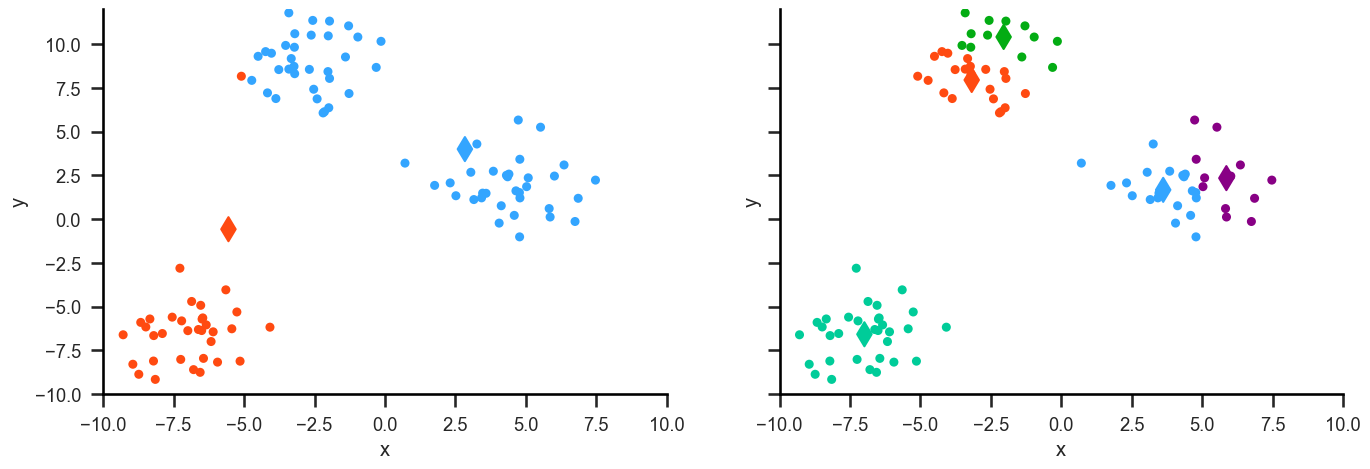

In [13]:
centroids_2 = np.array([[4, 8], [9, 5]])
centroids_5 = np.array([[-7.5, 5], [2.5, -2], [4, 8], [-3, -7], [9, 5]])
fig, ax = plt.subplots(1, 2, figsize=(16,5), sharey=True)
plot_clusters(n_iter=5, centroids=centroids_2, n_clusters=2, data=df_blobs, ax=ax[0])
plot_clusters(n_iter=5, centroids=centroids_5, n_clusters=5, data=df_blobs, ax=ax[1])

Notes: 
The figures show 3 clusters but 2 or 4 estimated groups, resp.  
In high dimensional problems, number of clusters can usually not be estimated  
In general you therefore want to get an analytical answer how many are sensible.

### Elbow Method

* test different amount of clusters k  
    → k is a hyperparameter
* calculate performance metric (eg. within-cluster sum of squares)
* decide for the amount of clusters where an additional cluster contributes only marginally

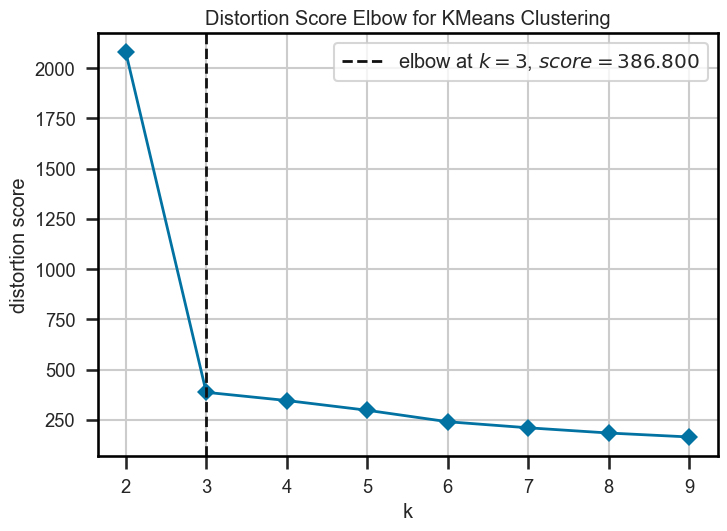

In [14]:
# Use elbow method with sample dataset to determine value for k 
kmeans_elbow_method = KMeans(init="k-means++", n_init="auto", random_state=42)
visualizer_elbow_method = KElbowVisualizer(kmeans_elbow_method, k=(2,10), timings=False)

# Fit visualizer to sample data and display plot
visualizer_elbow_method.fit(df_blobs)   
visualizer_elbow_method.show();

Notes:  
- We cannot optimize (= minimize) using k, since the optimum would be for k = n.  
- Distortion score is another term for the within-cluster sum of squares (= loss) or inertia.  
- The underlying function (KElbowVisualizer) automatically determines the elbow location.  
- In case you want to show the calculation time: Just set "timings" to True.

### Silhouette plot and silhouette coefficients

<div class="group">
  <div class="text">
      
**Silhouette plot**:
* based on silhouette coefficients (cluster average score) and score
* “knives” should extend over dashed line
* similar sizes are preferable
      
  </div>
  <div class="text">

**Silhouette coefficients**:
* close to 1: good clustering
* close to 0: overlapping clusters
* close to -1: incorrectly assigned
      
  </div>
</div>

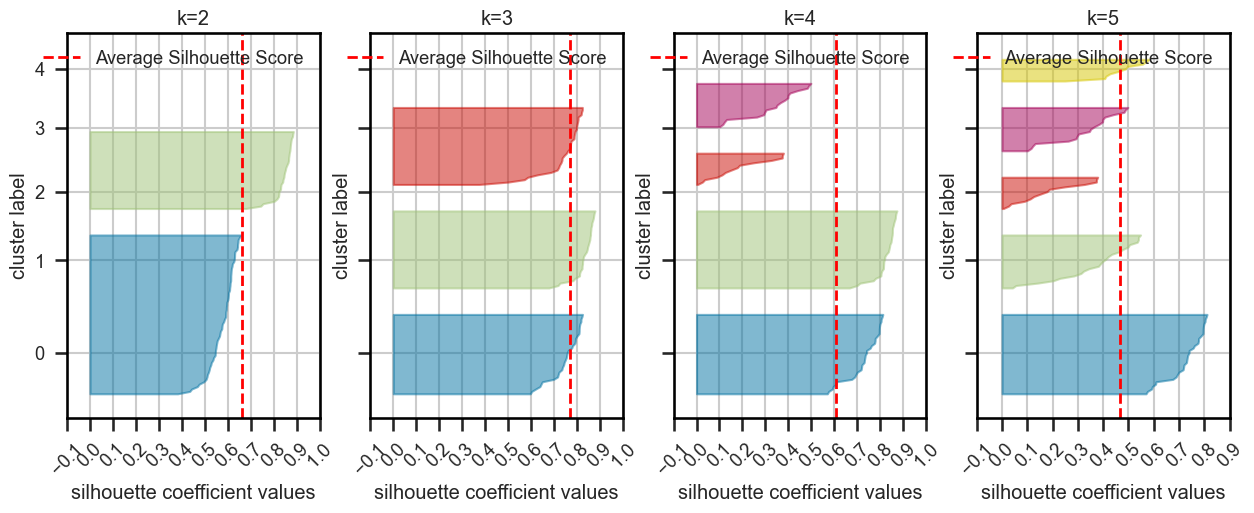

In [15]:
# Use the quick method and immediately show the figure
fig, ax = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
silhouette_visualizer(KMeans(2, random_state=42, n_init="auto"), df_blobs, colors='yellowbrick', show=False, ax=ax[0],  title="k=2",)
silhouette_visualizer(KMeans(3, random_state=42, n_init="auto"), df_blobs, colors='yellowbrick', show=False, ax=ax[1],  title="k=3")
silhouette_visualizer(KMeans(4, random_state=42, n_init="auto"), df_blobs, colors='yellowbrick', show=False, ax=ax[2],  title="k=4",)
silhouette_visualizer(KMeans(5, random_state=42, n_init="auto"), df_blobs, colors='yellowbrick', show=False, ax=ax[3],  title="k=5",)
for i in range(len(ax)):
    plt.setp(ax[i].get_xticklabels(), rotation=45);

Notes: 

Silhouette "coefficient": average Silhouettes (scores) per cluster. between -1 and +1. Near -1 for incorrect clustering and near +1 for highly dense clustering. Near 0 indicate overlapping clusters. Equal 1 would mean data points are infinitely compact within a cluster and/or infinitely far away from other clusters). 

In this example k=3 is best number for clusters because it results in the largest shilhouette score. y labels are based on k=5. 

The colored areas are formed by one line per observation.

Upon further request: 
Silhouette score (or just "Silhouette", for each point): S = (b - a) / max(b,a) with 
* a: dist of point to its cluster (intra-cluster distance)
* b: dist of point to the next-nearest cluster (nearest cluster distance)
* S: between -1 for incorrect clustering and +1 for highly dense clustering. 0 indicate overlapping clusters
* max(b,a): normalizing wrt the greater distance  

Good explanation can be found here: https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam

### K-means considerations
Pros  
- fast (computational effort scales with size of dataset, viz. linear)
- simple and therefore understandable
- interpretable results (e.g. centroid can be regarded as characteristic for a cluster)  
- Number of clusters can be defined (advantageous if specified by the business case)

Cons  
- Cannot easily handle clusters with different diameters,
- nor non-convex clusters.
- Number of clusters has to be defined (hyperparameter)  

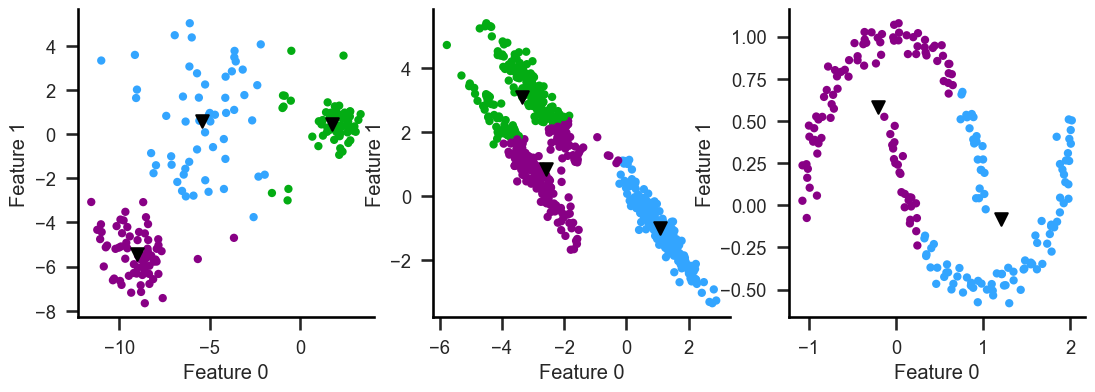

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(13, 4))
plot_data(df_density, centroids=True, marker_size=20, ax=ax[0])        
plot_data(df_stretched, centroids=True, marker_size=20, ax=ax[1])   
plot_data(df_moon, n_cluster=2, centroids=True, marker_size=20, ax=ax[2])

### K-means considerations   
General  
- Scale variables before clustering otherwise variables with large scale will dominate the clustering process.  
- K-means does not care for a balance within a dataset.
- It's a greedy algorithm  with outcome depending on initialization.   

Improvements  
- k-means++ (tends to select centroids that are distant from one another)
- Balanced K-means (enforces the cluster sizes to be strictly balanced)
- Regularized K-means (effective clustering of high-dimensional data)

Notes:  
regarding greedy: only optimum for each single step is taken into account. Final outcome depends on number K and initialization. Which other algorithm was greedy? (decision trees). 

## Hierarchical clustering

### Idea

Finding clusters not depending on random initialization.

### Algorithm

1. Find the most similar (&rarr; hyperparameter) two observations among all possible pairs  
2. Treat that cluster like a single observation.  
 (How to do that is another hyperparameter.)
3. Continue until all abservations belong to a cluster or until you have the desired number of clusters.

Notes:  
- "most similar" includes the need to define similarity (see the beginning of the lecture, e.g. Euklidiean, Manhatten, ...)  
- "like a single observation" includes the need to define the characteristic of a cluster like the centre, e.g. The following slide shows two possibilities.  

Those are two hyperparameters which have to be defined.

### Agglomerative algorithm

<div class="group">
  <div class="text_70">
    <img src="../images/clustering/img_p19_1.png">     
  </div>
  <div class="images_30">
  </div>
</div>

### Visualization

* **Dendrogram**: \
Visual representation of records and hierarchy of clusters to which they belong \
("dendro" is greek for tree)

### Visualization

<div class="group">
  <div class="text">
      
* plotting Dendrogram (visualize hierarchical clustering)
* samples are numbered
* shows order in which samples are clustered together (reading from bottom to top)
* y-axis shows how far apart clusters are
      
  </div>
  <div class="images">
    <img src="../images/clustering/img_p21_1.png">
  </div>
</div>

Notes: The above dendogram corresponds to the 9 steps shown before:  
e.g.Steep 4: 4x 2 obs., ..., ..., Step 9: 1x 5 obs., 1x 3 obs., 1x 4 obs.

### How to find the best number of clusters?

<div class="group">
  <div class="text">
      
* plotting Dendrogram (visualize hierarchical clustering)
* samples are numbered
* shows order in which samples are clustered together (reading from bottom to top)
* y-axis shows how far apart clusters are

      
  </div>
  <div class="images">
    <img src="../images/clustering/hirarchical.png">
  </div>
</div>

<div class="alert alert-block alert-info">
<b>Note:</b> 

→ optimal number of clusters: largest vertical distance within same number of clusters
</div>

Notes: can be used on subset of data to get nr. clusters and then do k-means

### Dissimilarity Metrics  

We need to define how far two observations / clusters are away from each other

<center>
    <img src="../images/clustering/clustering_linkage_transparent_bg.png" width=600>
</center>

What could be the "distance"?  
   - single-linkage,  
   - complete linke  
   - average linkage (average of all possible pairs)
   - centroid (using the centre point of each cluster
   - Ward's method  https://www.youtube.com/watch?v=vg1w5ZUF5lA

### Bottom up vs. top down

<div class="group">
  <div class="text">
      
* So far we investigated agglomeration (bottom up)
* Alternatively there is also divisive clustering (top down)
      
  </div>
  <div class="images">
    <img src="../images/clustering/Agglomeration_vs_Division.png">
  </div>
</div>

Notes: Divisive clustering can be done e.g. with recursive k-means clustering starting at the complete dataset  
and continuing on each intermediate subcluster, etc.


### Drawbacks of Agglomerative Clustering

<div class="group">
  <div class="text">
      
* not able to capture complex structure
* does not scale well with large data sets
* greedy algorithm (might not be globally optimal)

      
  </div>
  <div class="images">
    <img src="../images/clustering/img_p23_1.png" width=500>
  </div>
</div>

Notes: naive algorithm scales as O(N^3). clever O(N^2) algorithms exist for some linkage criteria

## DBSCAN

### Idea

DBSCAN:
**D**ensity-**b**ased **s**patial **c**lustering of **a**pplications with **n**oise

Idea:
* clusters dense regions which are separated by areas that are relatively empty
* it identifies points that don’t belong to any cluster (aka noise)


### Two hyper-parameters

<div class="group">
  <div class="text_70">
      
      
<br>     
     
* eps (max distance considered between points of a cluster)
* min_samples (required to form a cluster)
      
      
      
  </div>
  <div class="images_30">
    <img src="../images/clustering/clustering_dbscan_transparent_bg.png" width=250>
  </div>
</div>

<div class="alert alert-block alert-info">
<b>Note:</b> 

The core point itself is also counted when checking the min_samples requirement.
</div> 


Notes:  
eps: think of it as being the neighborhood of a point min_samples: minimum number of points we want to have in the neighborhood of a point

With min_samples being 5. Do you think this would fulfill the requirements? And what happens if we set min_samples to 6?

### Three types of points

<div class="group">
  <div class="text_70">
      
**Core point:**
* if there are at least *min_sample* points within distance *eps*

                                                                    
  </div>
  <div class="images_30">
    <img src="../images/clustering/dbscan_points_transparent_bg.png">
  </div>
</div>

Notes: Please remember to also show the following subslides.

### Three types of points

<div class="group">
  <div class="text_70">
      
**Core point:**
* if there are at least *min_sample* points within distance *eps*

**Boundary point:**
* if there is at least one core point within distance *eps*  
* but **less** neighbouring points than *min_samples*
      
                                                               
  </div>
  <div class="images_30">
    <img src="../images/clustering/dbscan_points_transparent_bg.png">
  </div>
</div>

### Three types of points

<div class="group">
  <div class="text_70">
      
**Core point:**
* if there are at least *min_sample* points within distance *eps*

**Boundary point:**
* if there is at least one core point within distance *eps*  
* but **less** neighbouring points than *min_samples*
      
**Noise (outlier):**
* if neither core nor boundary point  
&rarr; not reachable from any other cluster      

                                                                    
  </div>
  <div class="images_30">
    <img src="../images/clustering/dbscan_points_transparent_bg.png">
  </div>
</div>

### Procedure

<center>
    <img src="../images/clustering/DBSCAN.gif" width=1000>
</center>

[Gif source](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)

Notes: Higher min_samples or lower eps indicate higher density necessary to form a cluster.

1. Defining 2 Hyperparameters: min_samples (of a cluster) and eps (max distance between points of a cluster) 
2. Arbitrarily choose 1 starting point finding all points within distance eps of that point: less than min_samples in range eps: starting point is declared noise more/exact min_samples in range eps: starting point is declared core point of new cluster 
3. All neighbors (within eps) are visited if they are not assigned a cluster yet → assigned as core points if more/exact min_samples in range eps of that point (repeat 3.b.2) → assigned as boundary point of that cluster if less than min_samples in range eps: 
4. Start over with 2. until all points have been visited once (assigned as noise or cluster)

### Advantages

<div class="group">
  <div class="text_70">
      
* automatically identifies number of clusters
* able to identify complex formed clusters
* able to identify clusters with very different sizes
* distinguish between clusters (dense data) and noise  
      
However, boundary points can belong to different clusters. DBSCAN assigns those arbitrarily to one possible cluster.  
                                                                        
  </div>
  <div class="images_30">
    <img src="../images/clustering/img_p43_1.png">
    <img src="../images/clustering/img_p43_2.png">
  </div>
</div>

### DBSCAN in action

<div class="group">
  <div class="text">
      
To try out more DBSCAN in action, check out this amazing [blog](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/) by Naftali Harris.
                                                                        
  </div>
  <div class="images">
    <img src="../images/clustering/img_p44_2.png">
  </div>
</div>

## Summary
Great [documentation page](https://scikit-learn.org/stable/modules/clustering.html) on scikit-learn!

<center>
    <img src="../images/clustering/img_p45_2.png" width=900>
</center>

## References
- [Explanation of elbow method](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)
- [Wikipedia: DBSCAN](https://en.wikipedia.org/wiki/DBSCAN)
- [Book: Practical Statistics for Data Scientists](https://www.oreilly.com/library/view/practical-statistics-for/9781491952955/)
- [Visualizing k-means](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)
- [Visualizing DBSCAN](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)
- [Explanation of the Shilouette analysis](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

